In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv(r'/Users/sumitkumar/Documents/CloudyData/Python/Pandas/9. Restaurant-Sales-Data-Analysis.csv')

In [4]:
data.head(5)

,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City
0,10452,07-11-2022,Fries,3.49,573.07,Online,Gift Card,Tom Jackson,London
1,10453,07-11-2022,Beverages,2.95,745.76,Online,Gift Card,Pablo Perez,Madrid
2,10454,07-11-2022,Sides & Other,4.99,200.40,In-store,Gift Card,Joao Silva,Lisbon
3,10455,08-11-2022,Burgers,12.99,569.67,In-store,Credit Card,Walter Muller,Berlin
4,10456,08-11-2022,Chicken Sandwiches,9.95,201.01,In-store,Credit Card,Walter Muller,Berlin


In [5]:
sales=data.copy()

In [7]:
sales.duplicated().sum()

np.int64(0)

In [9]:
sales.isnull().sum()

Order ID          0
Date              0
Product           0
Price             0
Quantity          0
Purchase Type     0
Payment Method    0
Manager           0
City              0
dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        254 non-null    int64  
 1   Date            254 non-null    object 
 2   Product         254 non-null    object 
 3   Price           254 non-null    float64
 4   Quantity        254 non-null    float64
 5   Purchase Type   254 non-null    object 
 6   Payment Method  254 non-null    object 
 7   Manager         254 non-null    object 
 8   City            254 non-null    object 
dtypes: float64(2), int64(1), object(6)
memory usage: 18.0+ KB


In [21]:
sales.shape #to check how many rows and columns

(254, 9)

### Observation- Data type conversation-Quantity should be in integer data type.

In [11]:
sales.Quantity=sales.Quantity.astype(int)

In [15]:
sales.Date=pd.to_datetime(sales.Date,format='mixed')

In [16]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order ID        254 non-null    int64         
 1   Date            254 non-null    datetime64[ns]
 2   Product         254 non-null    object        
 3   Price           254 non-null    float64       
 4   Quantity        254 non-null    int64         
 5   Purchase Type   254 non-null    object        
 6   Payment Method  254 non-null    object        
 7   Manager         254 non-null    object        
 8   City            254 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 18.0+ KB


### Q.1) The total sales revenue for the entire dataset?

In [180]:
Total_sales=(sales['Price']*sales['Quantity']).sum()
Sales=pd.DataFrame({'Total_sales':[Total_sales]})
Sales

,Total_sales
0,768831.78


### Q.2) Most Preferred Payment Method ?

In [29]:
sales.head(2)

,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City
0,10452,2022-07-11,Fries,3.49,573,Online,Gift Card,Tom Jackson,London
1,10453,2022-07-11,Beverages,2.95,745,Online,Gift Card,Pablo Perez,Madrid


In [26]:
Pay_method=sales['Payment Method'].value_counts()
Pay_method

Payment Method
Credit Card    120
Cash            76
Gift Card       58
Name: count, dtype: int64

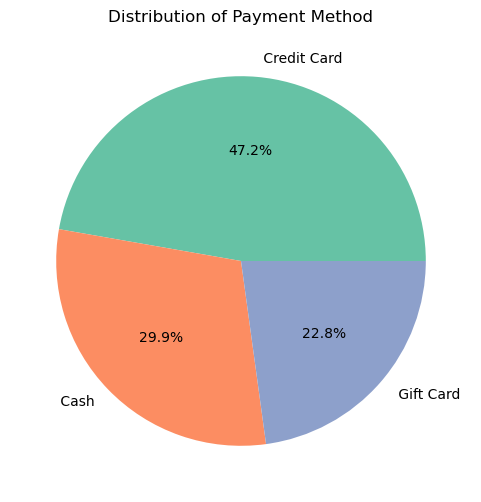

In [175]:
colors=sns.color_palette("Set2", len(Pay_method))
Pay_method.plot(kind='pie',autopct='%1.1f%%',title='Distribution of Payment Method',figsize=(6,6),colors=colors)
plt.ylabel('')
plt.show()

### Q.3) Most Selling Product ?

In [38]:
sales['Revenue']=sales['Price']*sales['Quantity'] #Create new column names Revenue
sales

,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City,Revenue
0,10452,2022-07-11,Fries,3.49,573,Online,Gift Card,Tom Jackson,London,1999.77
1,10453,2022-07-11,Beverages,2.95,745,Online,Gift Card,Pablo Perez,Madrid,2197.75
2,10454,2022-07-11,Sides & Other,4.99,200,In-store,Gift Card,Joao Silva,Lisbon,998.00
3,10455,2022-08-11,Burgers,12.99,569,In-store,Credit Card,Walter Muller,Berlin,7391.31
4,10456,2022-08-11,Chicken Sandwiches,9.95,201,In-store,Credit Card,Walter Muller,Berlin,1999.95
...,...,...,...,...,...,...,...,...,...,...
249,10709,2022-12-28,Sides & Other,4.99,200,Drive-thru,Gift Card,Walter Muller,Berlin,998.00
250,10710,2022-12-29,Burgers,12.99,754,Drive-thru,Gift Card,Walter Muller,Berlin,9794.46
251,10711,2022-12-29,Chicken Sandwiches,9.95,281,Drive-thru,Gift Card,Walter Muller,Berlin,2795.95
252,10712,2022-12-29,Fries,3.49,630,Drive-thru,Gift Card,Walter Muller,Berlin,2198.70


In [42]:
Product_sell=sales.groupby('Product')['Revenue'].sum().sort_values(ascending=False).head(5)
Product_sell

Product
Burgers               376658.04
Fries                 125602.14
Chicken Sandwiches    114602.50
Beverages             103067.10
Sides & Other          48902.00
Name: Revenue, dtype: float64

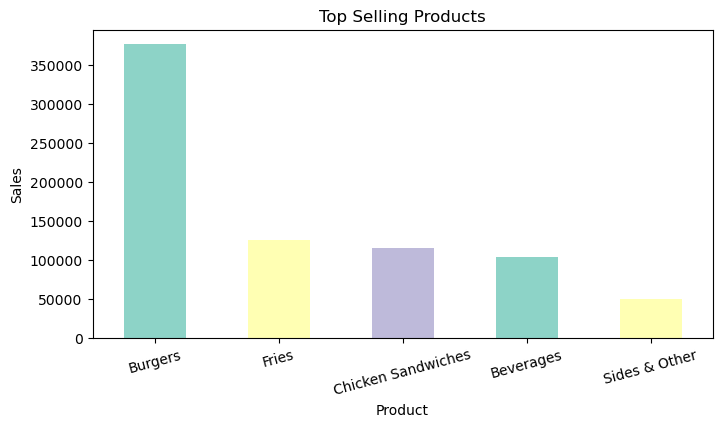

In [209]:
colors=sns.color_palette("Set3", len(Pay_method))
Product_sell.plot(kind='bar',ylabel='Sales',figsize=(8,4),color=colors,title='Top Selling Products')
plt.xticks(rotation=15)
plt.show()

### Q.4)Average price each product

In [186]:
Product_price=sales.groupby('Product')['Price'].mean().sort_values(ascending=False).head(5)
Product_price

Product
Burgers               12.990000
Chicken Sandwiches    10.317308
Sides & Other          4.990000
Fries                  3.921569
Beverages              2.950000
Name: Price, dtype: float64

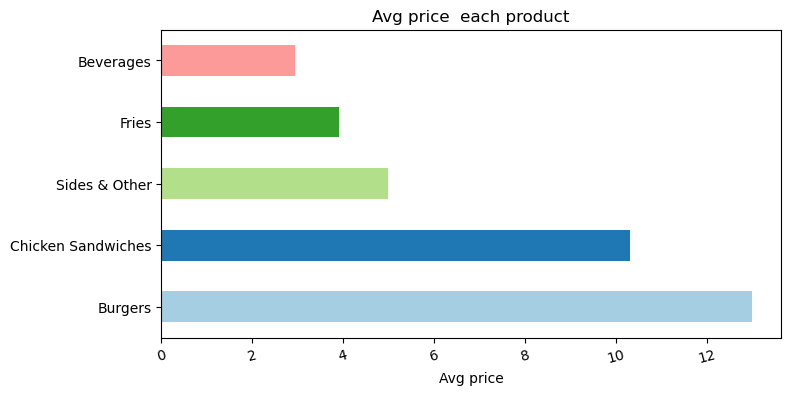

In [210]:
colors=sns.color_palette("Paired", len(Product_price))
Product_price.plot(kind='barh',ylabel='',xlabel='Avg price',figsize=(8,4),color=colors, title='Avg price  each product')
plt.xticks(rotation=15)
plt.show()

### Q.5) Calculate the total quantity sold for each product

In [194]:
Product_Quantity=sales.groupby('Product')['Quantity'].sum().sort_values(ascending=False).head(5)
Product_Quantity

Product
Beverages             34938
Fries                 32016
Burgers               28996
Chicken Sandwiches    11132
Sides & Other          9800
Name: Quantity, dtype: int64

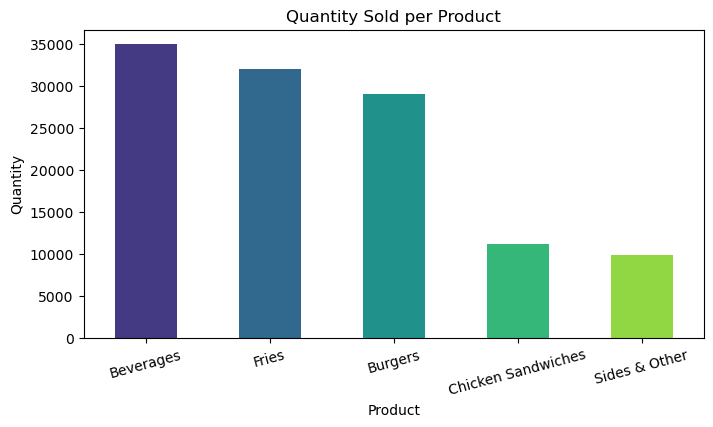

In [211]:
colors=sns.color_palette("viridis", len(Product_Quantity))
Product_Quantity.plot(kind='bar',ylabel='Quantity',figsize=(8,4),color=colors,title='Quantity Sold per Product')
plt.xticks(rotation=15)
plt.show()

### Q.6) Calculate the total quantity sold by each city

In [212]:
City_Quantity=sales.groupby('City')['Quantity'].sum().sort_values(ascending=False).head(5)
City_Quantity

City
Lisbon    35718
London    33503
Madrid    20426
Berlin    14755
Paris     12480
Name: Quantity, dtype: int64

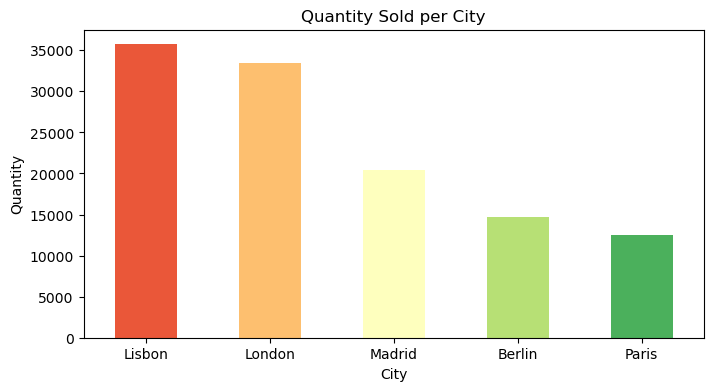

In [219]:
colors=sns.color_palette("RdYlGn", len(City_Quantity))
City_Quantity.plot(kind='bar',ylabel='Quantity',figsize=(8,4),color=colors,title='Quantity Sold per City')
plt.xticks(rotation=0)
plt.show()

### Q.7) calculate the  top 5 Manages based on maximum quantity sold 

In [222]:
sales.head()

,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City,Revenue,Day,Month
0,10452,2022-07-11,Fries,3.49,573,Online,Gift Card,Tom Jackson,London,1999.77,Monday,7
1,10453,2022-07-11,Beverages,2.95,745,Online,Gift Card,Pablo Perez,Madrid,2197.75,Monday,7
2,10454,2022-07-11,Sides & Other,4.99,200,In-store,Gift Card,Joao Silva,Lisbon,998.00,Monday,7
3,10455,2022-08-11,Burgers,12.99,569,In-store,Credit Card,Walter Muller,Berlin,7391.31,Thursday,8
4,10456,2022-08-11,Chicken Sandwiches,9.95,201,In-store,Credit Card,Walter Muller,Berlin,1999.95,Thursday,8


In [223]:
Manager_Quantity=sales.groupby('Manager')['Quantity'].sum().sort_values(ascending=False).head(5)
Manager_Quantity

Manager
Joao Silva       33917
Tom Jackson      32930
Pablo Perez      15389
Walter Muller    14755
Remy Monet       10457
Name: Quantity, dtype: int64

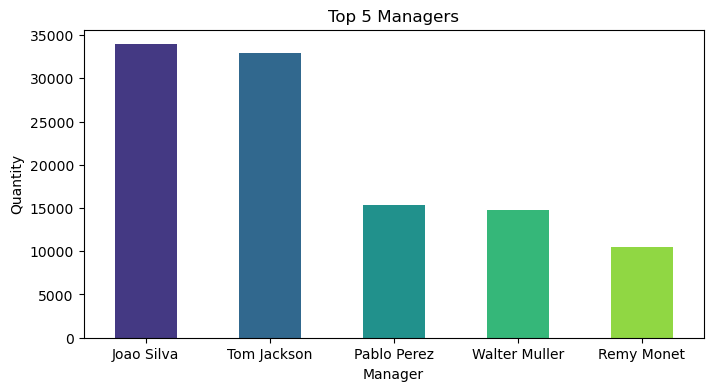

In [224]:
colors=sns.color_palette("viridis", len(Manager_Quantity))
Manager_Quantity.plot(kind='bar',ylabel='Quantity',figsize=(8,4),color=colors,title='Top 5 Managers')
plt.xticks(rotation=0)
plt.show()

In [225]:
sales.head()

,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City,Revenue,Day,Month
0,10452,2022-07-11,Fries,3.49,573,Online,Gift Card,Tom Jackson,London,1999.77,Monday,7
1,10453,2022-07-11,Beverages,2.95,745,Online,Gift Card,Pablo Perez,Madrid,2197.75,Monday,7
2,10454,2022-07-11,Sides & Other,4.99,200,In-store,Gift Card,Joao Silva,Lisbon,998.00,Monday,7
3,10455,2022-08-11,Burgers,12.99,569,In-store,Credit Card,Walter Muller,Berlin,7391.31,Thursday,8
4,10456,2022-08-11,Chicken Sandwiches,9.95,201,In-store,Credit Card,Walter Muller,Berlin,1999.95,Thursday,8


### Q.8) What is relation between purchase type and payment method

In [245]:
Relation=sales.groupby(['Purchase Type','Payment Method']).size().unstack(fill_value=0)
Relation

Payment Method,Cash,Credit Card,Gift Card
Purchase Type,,,
Drive-thru,19,32,10
In-store,43,41,2
Online,14,47,46


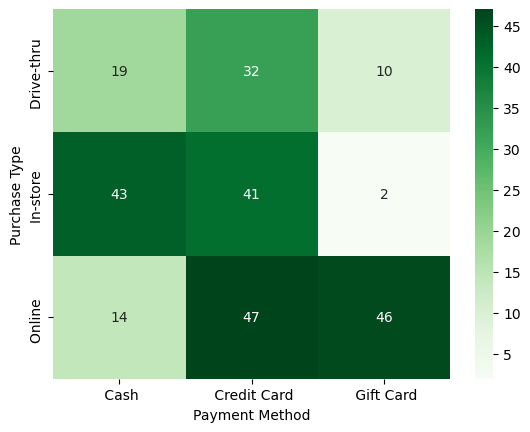

In [248]:

sns.heatmap(Relation,annot=True,fmt='d',cmap='Greens')
plt.show()

### Q.9) Which city had maximum revenue

In [63]:
Revenue_city=sales.groupby('City')['Revenue'].sum()
Revenue_city

City
Berlin    100492.73
Lisbon    241509.38
London    211001.83
Madrid    136098.22
Paris      79729.62
Name: Revenue, dtype: float64

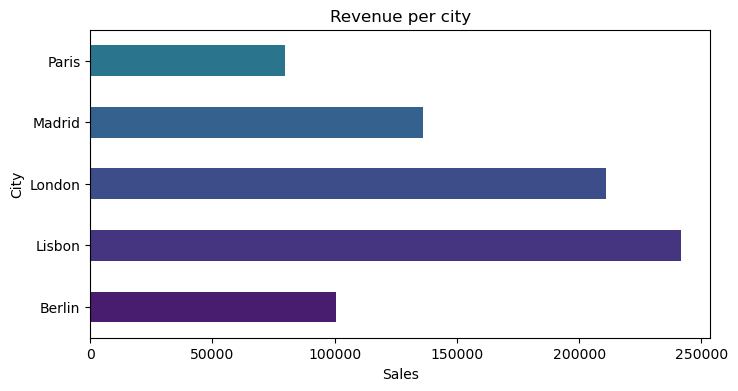

In [256]:
colors=sns.color_palette("viridis",len('Revenue_city'))
Revenue_city.plot(kind='barh',figsize=(8,4),xlabel='Sales',title='Revenue per city',color=colors)
plt.show()

### Q.10) Date wise revenue

In [263]:
Revenue_Date=sales.groupby('Date')['Revenue'].sum().sort_values(ascending=False).head(5)
Revenue_Date

Date
2022-11-13    27659.02
2022-11-14    17826.67
2022-12-28    17580.57
2022-12-27    16978.88
2022-12-26    16978.88
Name: Revenue, dtype: float64

### Q.11) Day wise Revenue

In [100]:

sales['Day']=sales['Date'].dt.day_name()
Day_order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
Revenue_Day=(sales.groupby('Day')['Revenue'].sum().reindex(Day_order))
Revenue_Day

Day
Monday       112335.82
Tuesday      124283.94
Wednesday    117496.75
Thursday     101912.87
Friday        87304.87
Saturday     101925.79
Sunday       123571.74
Name: Revenue, dtype: float64

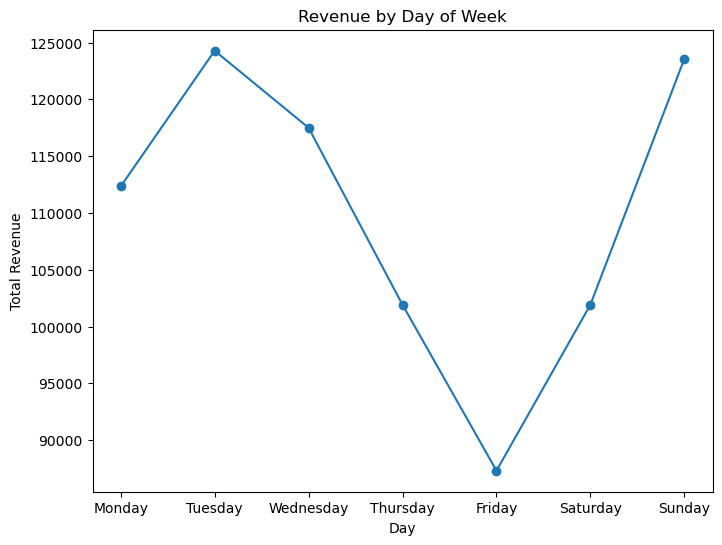

In [107]:

Revenue_Day.plot(kind='line', figsize=(8,6),marker='o',title='Revenue by Day of Week',ylabel='Total Revenue')
plt.show()

### Q.12) Average Revenue

In [262]:
Avg_Revenue=sales['Revenue'].mean().round(2)
Avg=pd.DataFrame({"Average Revenue":[Avg_Revenue]})
Avg

,Average Revenue
0,3026.9


### Q.13) Average Revenue of November & December month

In [110]:
sales['Month']=sales['Date'].dt.month # Create new column for month to filter according to month
sales

,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City,Revenue,Day,Month
0,10452,2022-07-11,Fries,3.49,573,Online,Gift Card,Tom Jackson,London,1999.77,Monday,7
1,10453,2022-07-11,Beverages,2.95,745,Online,Gift Card,Pablo Perez,Madrid,2197.75,Monday,7
2,10454,2022-07-11,Sides & Other,4.99,200,In-store,Gift Card,Joao Silva,Lisbon,998.00,Monday,7
3,10455,2022-08-11,Burgers,12.99,569,In-store,Credit Card,Walter Muller,Berlin,7391.31,Thursday,8
4,10456,2022-08-11,Chicken Sandwiches,9.95,201,In-store,Credit Card,Walter Muller,Berlin,1999.95,Thursday,8
...,...,...,...,...,...,...,...,...,...,...,...,...
249,10709,2022-12-28,Sides & Other,4.99,200,Drive-thru,Gift Card,Walter Muller,Berlin,998.00,Wednesday,12
250,10710,2022-12-29,Burgers,12.99,754,Drive-thru,Gift Card,Walter Muller,Berlin,9794.46,Thursday,12
251,10711,2022-12-29,Chicken Sandwiches,9.95,281,Drive-thru,Gift Card,Walter Muller,Berlin,2795.95,Thursday,12
252,10712,2022-12-29,Fries,3.49,630,Drive-thru,Gift Card,Walter Muller,Berlin,2198.70,Thursday,12


In [132]:
Avg_Revenue=sales.loc[sales['Month']==11,'Revenue'].mean()
Avg_Revenue

np.float64(2967.8207216494843)

In [131]:
Avg_Revenue12=sales.loc[sales['Month']==12,'Revenue'].mean()
Avg_Revenue12

np.float64(3192.758191489363)

In [ ]:
### OR to calculate Average in one line of code.

In [161]:

Avg=sales[sales['Month'].isin([11,12])].groupby('Month')['Revenue'].mean().round(2)
Avg

Month
11    2967.82
12    3192.76
Name: Revenue, dtype: float64

### Q.14) Standard Deviation of Revenue and Quantity ?

In [136]:
sales['Revenue'].std()

2418.1931282105456

In [137]:
sales['Quantity'].std()

214.69197583196447

### Q.15) Variance of Revenue and Quantity ?

In [138]:
sales['Revenue'].var()

5847658.005324705

In [139]:
sales['Quantity'].var()

46092.64448663282

### Q.16) Is revenue increasing or decreasing over time?#monthly base

In [141]:
Monthly_revenue =sales.groupby('Month')['Revenue'].sum()
Monthly_revenue 

Month
1      13385.95
2      13987.57
3      13987.57
4       8988.57
5      14191.33
6      13983.49
7      19183.09
8      26571.45
9      28776.44
10     27778.44
11    287878.61
12    300119.27
Name: Revenue, dtype: float64

Monthly_revenue.plot(x='line',marker='o',figsize=(8,6),ylabel='Monthly Revenue')
plt.show()

### Q.17) Average 'Quantity Sold' & 'Average Revenue' for each product ?

In [145]:
sales.groupby('Product')['Quantity'].mean()

Product
Beverages             698.760000
Burgers               557.615385
Chicken Sandwiches    214.076923
Fries                 627.764706
Sides & Other         200.000000
Name: Quantity, dtype: float64

In [146]:
sales.groupby('Product')['Revenue'].mean()

Product
Beverages             2061.342000
Burgers               7243.423846
Chicken Sandwiches    2203.894231
Fries                 2462.787059
Sides & Other          998.000000
Name: Revenue, dtype: float64

In [152]:
#OR
sales.groupby('Product')[['Quantity','Revenue']].agg({'Quantity':'mean','Revenue':'mean'}).round(2)

,Quantity,Revenue
Product,,
Beverages,698.76,2061.34
Burgers,557.62,7243.42
Chicken Sandwiches,214.08,2203.89
Fries,627.76,2462.79
Sides & Other,200.00,998.00
